In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import datetime

from scipy import optimize
import theano as thno
import theano.tensor as T

# data retrieval helper module
from general.DB import DB
import util

from sklearn.linear_model import LinearRegression

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

In [2]:
# get the data we need from the database
games_df, stacked, teams = util.get_data(2016)
games_df = games_df.sort('dt')  # sort by date ascending
last_games = games_df.iloc[-1:]
games_df = games_df.iloc[:-1]
kenpom = pd.read_sql("SELECT team, adjt FROM kenpom_ranks WHERE year = 2016", DB.conn)
all_teams = pd.read_sql("SELECT ncaa, ncaaid, kenpom FROM teams", DB.conn)
teams = teams.merge(all_teams, left_on='team_id', right_on='ncaaid')
teams = teams.merge(kenpom, how='left', left_on='kenpom', right_on='team').drop(['team', 'kenpom'], 1)
num_teams = teams.shape[0]
print("Got data for %s games and %s teams, between %s and %s" % (games_df.shape[0], num_teams,
                                                   datetime.datetime.strftime(games_df['dt'].min(), "%m-%d-%Y"),
                                                  datetime.datetime.strftime(games_df['dt'].max(), "%m-%d-%Y")))

Got data for 5454 games and 351 teams, between 11-13-2015 and 04-02-2016


In [6]:
game_indices = games_df[['i_hteam', 'i_ateam']].values
data = []
for idx in game_indices:
    x = np.zeros(num_teams)
    x[idx] = 1
    data.append(x)
data = np.array(data)

In [10]:
X = data[:, list(range(num_teams - 1))]
y = games_df.poss.values

In [11]:
lr = LinearRegression()
lr.fit(X, y)

/usr/local/lib/python3.4/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

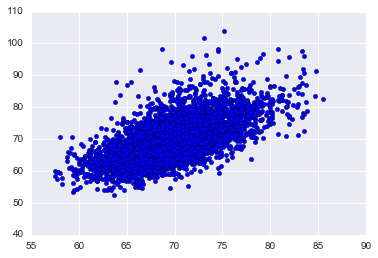

In [14]:
y_pred = lr.predict(X)
plt.scatter(y_pred, y)